In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.models import Sequential
import tensorflow as tf

In [2]:
house_df=pd.read_csv('F:\my project\dataset\learning_dataset\\HousingData.csv')
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
house_df.dropna(inplace=True)

In [13]:
x=house_df.drop('MEDV',axis=1).values
y=house_df.MEDV.values

In [14]:
x.shape

(394, 13)

In [15]:
for i in range(x.shape[1]):
    col=x[:,i]
    x[:,i]=(col-np.mean(col))/np.std(col)

In [16]:
x

array([[-0.40081837,  0.27334191, -1.25962   , ..., -1.49630294,
         0.43074011, -1.06712587],
       [-0.39853454, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.43074011, -0.49719648],
       [-0.39853672, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.38509692, -1.19727801],
       ...,
       [-0.3965804 , -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.50541662],
       [-0.39489501, -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.97670438],
       [-0.38958205, -0.47905119,  0.13466553, ...,  1.13806296,
         0.39204993, -0.86162248]])

In [17]:
y

array([24. , 21.6, 34.7, 33.4, 28.7, 27.1, 16.5, 15. , 18.9, 21.7, 20.4,
       19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9,
       16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2, 13.1, 13.5, 21. , 24.7,
       30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 20. , 14.4, 19.4, 19.7, 25. ,
       18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. ,
       23.5, 19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 21.4, 20. , 20.8,
       21.2, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 23.6, 28.7, 22.6,
       22. , 25. , 20.6, 28.4, 21.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8, 18.7, 18.5,
       19.2, 22. , 20.3, 20.5, 18.8, 21.4, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 15.6, 18.1, 17.4, 17.1, 17.8, 14. , 14.4, 13.4, 15.6, 11.8,
       13.8, 15.4, 19.6, 19.4, 17. , 13.1, 24.3, 23.3, 27. , 50. , 50. ,
       22.7, 25. , 50. , 23.8, 22.3, 17.4, 19.1, 23.1, 22.6, 29.4, 23.2,
       29.9, 37.2, 39.8, 36.2, 37.9, 26.4, 29.6, 32

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [19]:
x_train

array([[-0.38675856,  0.04344402, -0.71466017, ...,  0.1675071 ,
         0.43074011,  0.04396242],
       [-0.39160148, -0.47905119, -1.23787958, ..., -0.3408793 ,
         0.39956368, -1.08904623],
       [-0.35714505, -0.47905119, -0.69581847, ..., -0.52574708,
         0.41212397,  1.1906713 ],
       ...,
       [-0.39489501, -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.97670438],
       [ 0.67746622, -0.47905119,  1.02892142, ...,  0.76832739,
        -0.22800221,  2.3565605 ],
       [-0.39362417,  2.02892579, -1.3494804 , ..., -0.10979457,
         0.37948964, -0.68214953]])

In [20]:
x_test

array([[ 2.25266634, -0.47905119,  1.02892142, ...,  0.76832739,
         0.43074011,  2.12502669],
       [-0.39492656, -0.47905119, -1.23787958, ..., -0.3408793 ,
         0.32094972,  0.05218256],
       [-0.27170794, -0.47905119,  1.57822934, ...,  1.23049685,
         0.43074011, -0.06974945],
       ...,
       [-0.37108734, -0.47905119, -0.1899914 , ...,  0.30615794,
         0.43074011,  0.11246355],
       [-0.38327026, -0.47905119, -0.52479385, ...,  0.49102572,
         0.43074011, -0.76298086],
       [ 2.05717604, -0.47905119,  1.02892142, ...,  0.76832739,
         0.43074011,  2.63330505]])

In [38]:
model=tf.keras.models.Sequential()
model.add(Dense(26,activation='sigmoid',input_dim=x.shape[1]))
model.add(Dense(13,activation='relu'))
model.add(Dense(1))

In [39]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.RMSprop(0.001),metrics=['mean_squared_error'])

In [40]:
model.fit(x_train,y_train,batch_size=30,epochs=1000)

Epoch 1/1000
11/11 [==============================] - 1s 2ms/step - loss: 551.9309 - mean_squared_error: 551.9309
Epoch 2/1000
11/11 [==============================] - 0s 2ms/step - loss: 531.7650 - mean_squared_error: 531.7650
Epoch 3/1000
11/11 [==============================] - 0s 2ms/step - loss: 516.1139 - mean_squared_error: 516.1139
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 501.6319 - mean_squared_error: 501.6319
Epoch 5/1000
11/11 [==============================] - 0s 2ms/step - loss: 487.3363 - mean_squared_error: 487.3363
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 472.8136 - mean_squared_error: 472.8136
Epoch 7/1000
11/11 [==============================] - 0s 1ms/step - loss: 457.8791 - mean_squared_error: 457.8791
Epoch 8/1000
11/11 [==============================] - 0s 2ms/step - loss: 442.7660 - mean_squared_error: 442.7660
Epoch 9/1000
11/11 [==============================] - 0s 1ms/step - loss: 427.2992 - mea

In [41]:
pred=model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


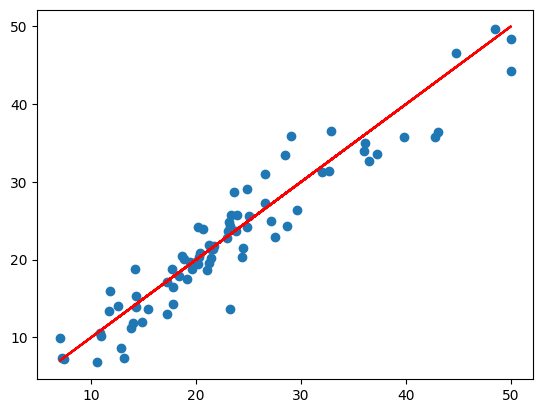

In [42]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,c='red')

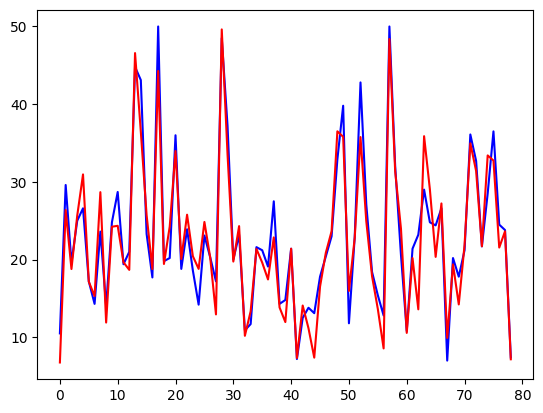

In [43]:
plt.plot(y_test,c='blue')
plt.plot(pred,c='red')

In [44]:
model.layers[0].get_weights()

[array([[-4.97399867e-02, -6.41979218e-01,  6.32291287e-02,
         -3.32371116e-01,  1.15498269e+00, -8.74306560e-02,
          7.38729760e-02, -1.25123322e-01, -6.58867538e-01,
         -2.82706767e-01,  3.87470186e-01, -9.80749428e-01,
          9.30364192e-01,  8.22102070e-01, -3.29336673e-01,
         -1.78210050e-01,  6.12524487e-02,  1.65615782e-01,
         -4.98600662e-01,  8.05583775e-01, -1.89362407e-01,
         -8.13011110e-01,  2.08074540e-01, -3.75263900e-01,
         -1.53298810e-01, -2.23597094e-01],
        [ 2.33262330e-01, -2.92906463e-01, -4.00401860e-01,
         -1.99947879e-01,  7.00583518e-01, -1.55497029e-01,
          2.49181271e-01,  2.69086927e-01,  3.14452857e-01,
         -9.40829664e-02, -1.71431646e-01, -2.59341061e-01,
         -2.93493241e-01,  1.49510458e-01, -1.63364969e-03,
          2.99189240e-01, -1.33733049e-01,  1.08158898e+00,
          3.43081355e-01,  2.72885291e-03, -2.91737288e-01,
         -5.48004061e-02,  1.50383385e-02,  1.89657003e-

In [45]:
len(model.layers[0].get_weights())

2

weights and bias

In [46]:
len(model.layers[0].get_weights()[0])

13

number of data dimension

In [47]:
len(model.layers[0].get_weights()[0][0])

26

number of neuron